In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn; sn.set()
from IPython.display import Image

In [5]:
plt.rcParams['figure.figsize'] = (10,8)

In [6]:
pwd

u'/home/rakhsh/ex2'

In [7]:
import gzip

with gzip.GzipFile("./modellingProjectTraining.txt.gz") as zf:
    df = pd.read_csv(zf, sep=";")

In [8]:
#df2 = pd.read_csv("./modellingProjectModelling.txt", sep=";")

In [9]:
df.head().T

,0,1,2,3,4
Customer_ID,1,2,3,4,5
Customer_Value,171.057,51.686,88.558,24.079,46.308
Gender,M,M,M,M,M
Age,73,42,60,25,39
Income,93000,64000,74000,65000,62000
CE_Pet_Model,4.084,2.431,1.915,-0.331,4.652
CE_Frozen_Meal_Model,14.942,1.411,8.059,3.18,7.882
CE_Donations_Model,3.944,-0.362,0.617,-3.364,0.653
CE_Foreign_Travel_Model,4.938,6.078,3.281,-3.395,2.94
CE_Physical_Fitness_Model,1.591,1.93,0.811,0.401,1.751


In [11]:
df.shape

(2000000, 15)

In [12]:
corr = df.corr()

In [13]:
corr.Customer_Value.sort(ascending=False, inplace=False)

Customer_Value                  1.000000
Age                             0.256975
Income                          0.199379
CE_Foreign_Travel_Model         0.132816
CE_Donations_Model              0.101183
CE_Higher_Education_Model       0.076591
CE_Pro_Tax_Preparation_Model    0.069835
CE_Golf_Model                   0.031667
CE_Pet_Model                    0.008471
Customer_ID                    -0.000296
CE_Frozen_Meal_Model           -0.001201
CE_Avid_TV_Model               -0.103387
CE_Physical_Fitness_Model      -0.105284
CE_Social_Networking_Model     -0.152511
Name: Customer_Value, dtype: float64

In [14]:
df.dtypes

Customer_ID                       int64
Customer_Value                  float64
Gender                           object
Age                             float64
Income                          float64
CE_Pet_Model                    float64
CE_Frozen_Meal_Model            float64
CE_Donations_Model              float64
CE_Foreign_Travel_Model         float64
CE_Physical_Fitness_Model       float64
CE_Pro_Tax_Preparation_Model    float64
CE_Golf_Model                   float64
CE_Higher_Education_Model       float64
CE_Avid_TV_Model                float64
CE_Social_Networking_Model      float64
dtype: object

In [15]:
feat = pd.get_dummies(df.ix[:,2:], columns=["Gender"])
feat.head().T

,0,1,2,3,4
Age,73.000,42.000,60.000,25.000,39.000
Income,93000.000,64000.000,74000.000,65000.000,62000.000
CE_Pet_Model,4.084,2.431,1.915,-0.331,4.652
CE_Frozen_Meal_Model,14.942,1.411,8.059,3.180,7.882
CE_Donations_Model,3.944,-0.362,0.617,-3.364,0.653
CE_Foreign_Travel_Model,4.938,6.078,3.281,-3.395,2.940
CE_Physical_Fitness_Model,1.591,1.930,0.811,0.401,1.751
CE_Pro_Tax_Preparation_Model,-1.676,0.851,-0.838,0.178,2.737
CE_Golf_Model,5.389,1.539,2.239,1.110,0.350
CE_Higher_Education_Model,-3.724,-1.177,0.231,-2.834,5.628


In [16]:
feat = feat.drop(["Gender_M"], axis=1)

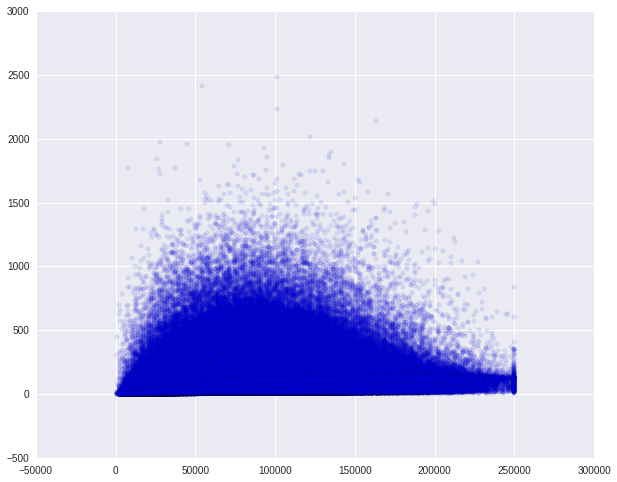

In [17]:
_ = plt.scatter(df.Income, df.Customer_Value, alpha=.1)

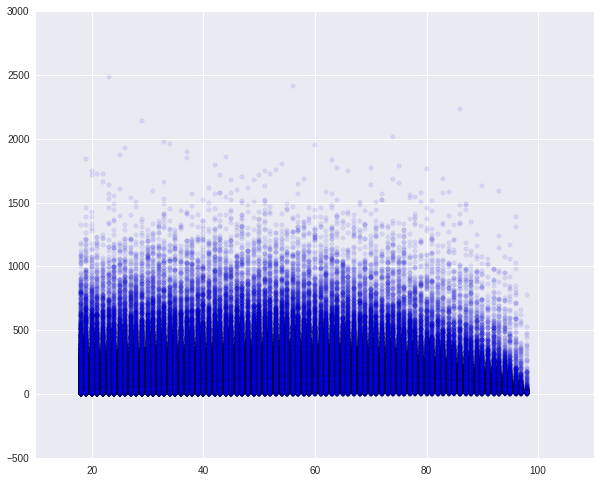

In [18]:
_ = plt.scatter(df.Age, df.Customer_Value, alpha=.1)

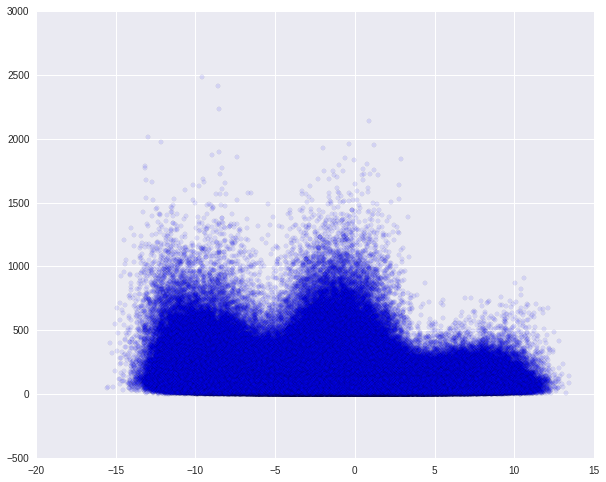

In [19]:
_ = plt.scatter(df.CE_Social_Networking_Model,df.Customer_Value, alpha=.1)

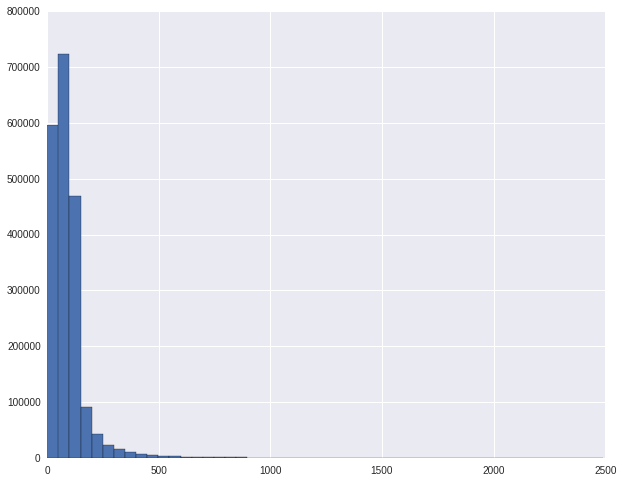

In [20]:
df.Customer_Value.hist(bins=50)

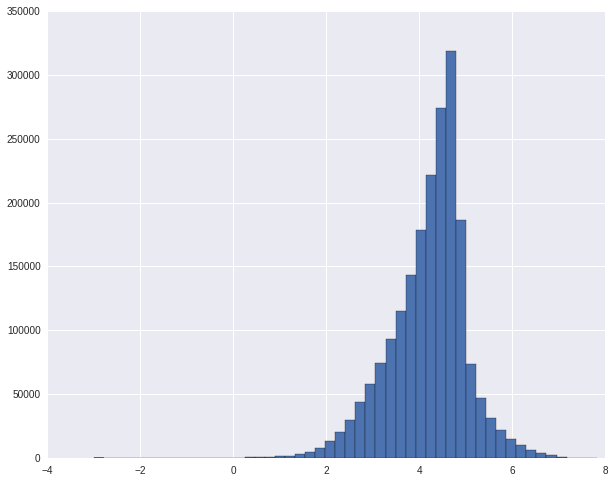

In [21]:
df.Customer_Value.apply(lambda x: np.log(x)).hist(bins=50)

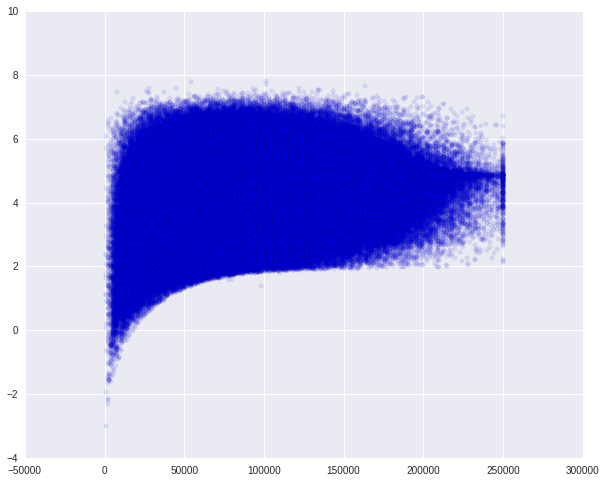

In [24]:
plt.scatter(df.Income, np.log(df.Customer_Value), alpha=.1)

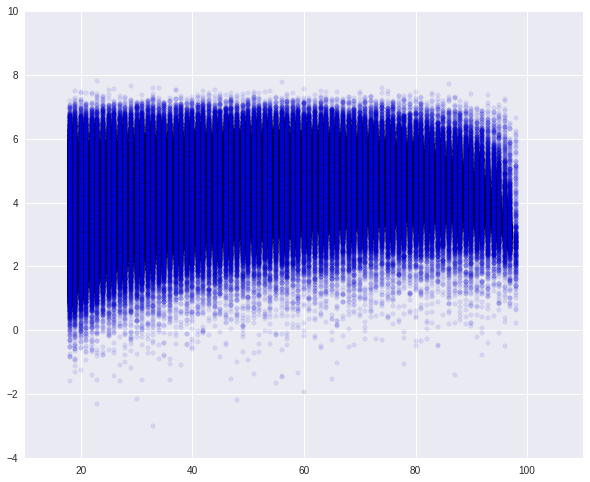

In [22]:
plt.scatter(df.Age, np.log(df.Customer_Value), alpha=.1)

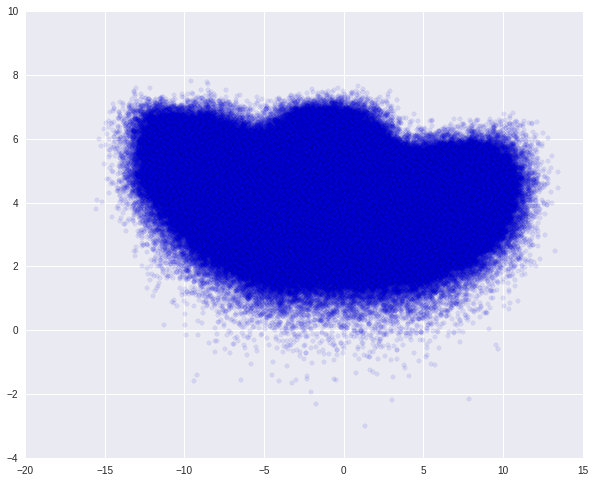

In [23]:
plt.scatter(df.CE_Social_Networking_Model, np.log(df.Customer_Value), alpha=.1)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(whiten=True)

In [26]:
pca.fit(feat.values)

PCA(copy=True, n_components=None, whiten=True)

In [27]:
pca.explained_variance_ratio_

array([  9.99999642e-01,   2.64143561e-07,   3.36593693e-08,
         2.39531184e-08,   1.52489603e-08,   1.06866458e-08,
         5.12365515e-09,   2.00032259e-09,   1.18826920e-09,
         7.15415370e-10,   7.15327600e-10,   7.14850668e-10,
         1.01819061e-10])

In [28]:
pca = PCA(n_components=2, whiten=True)

In [29]:
dfpca = pca.fit_transform(feat.values)

<matplotlib.colorbar.Colorbar instance at 0x7fc12e7b0b00>

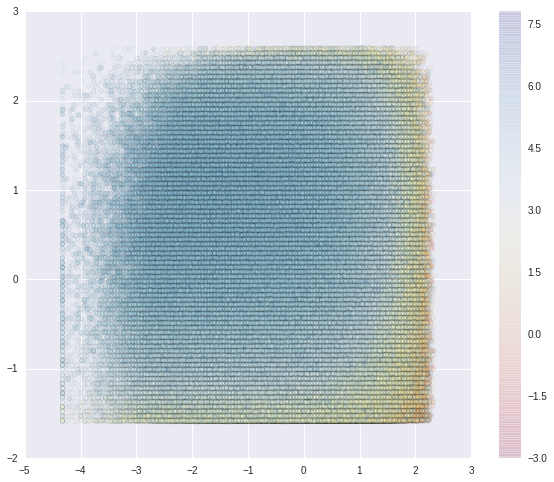

In [30]:
plt.scatter(dfpca[:,0],dfpca[:,1], c=np.log(df.Customer_Value), cmap="RdYlBu", alpha=.1 )
plt.colorbar()

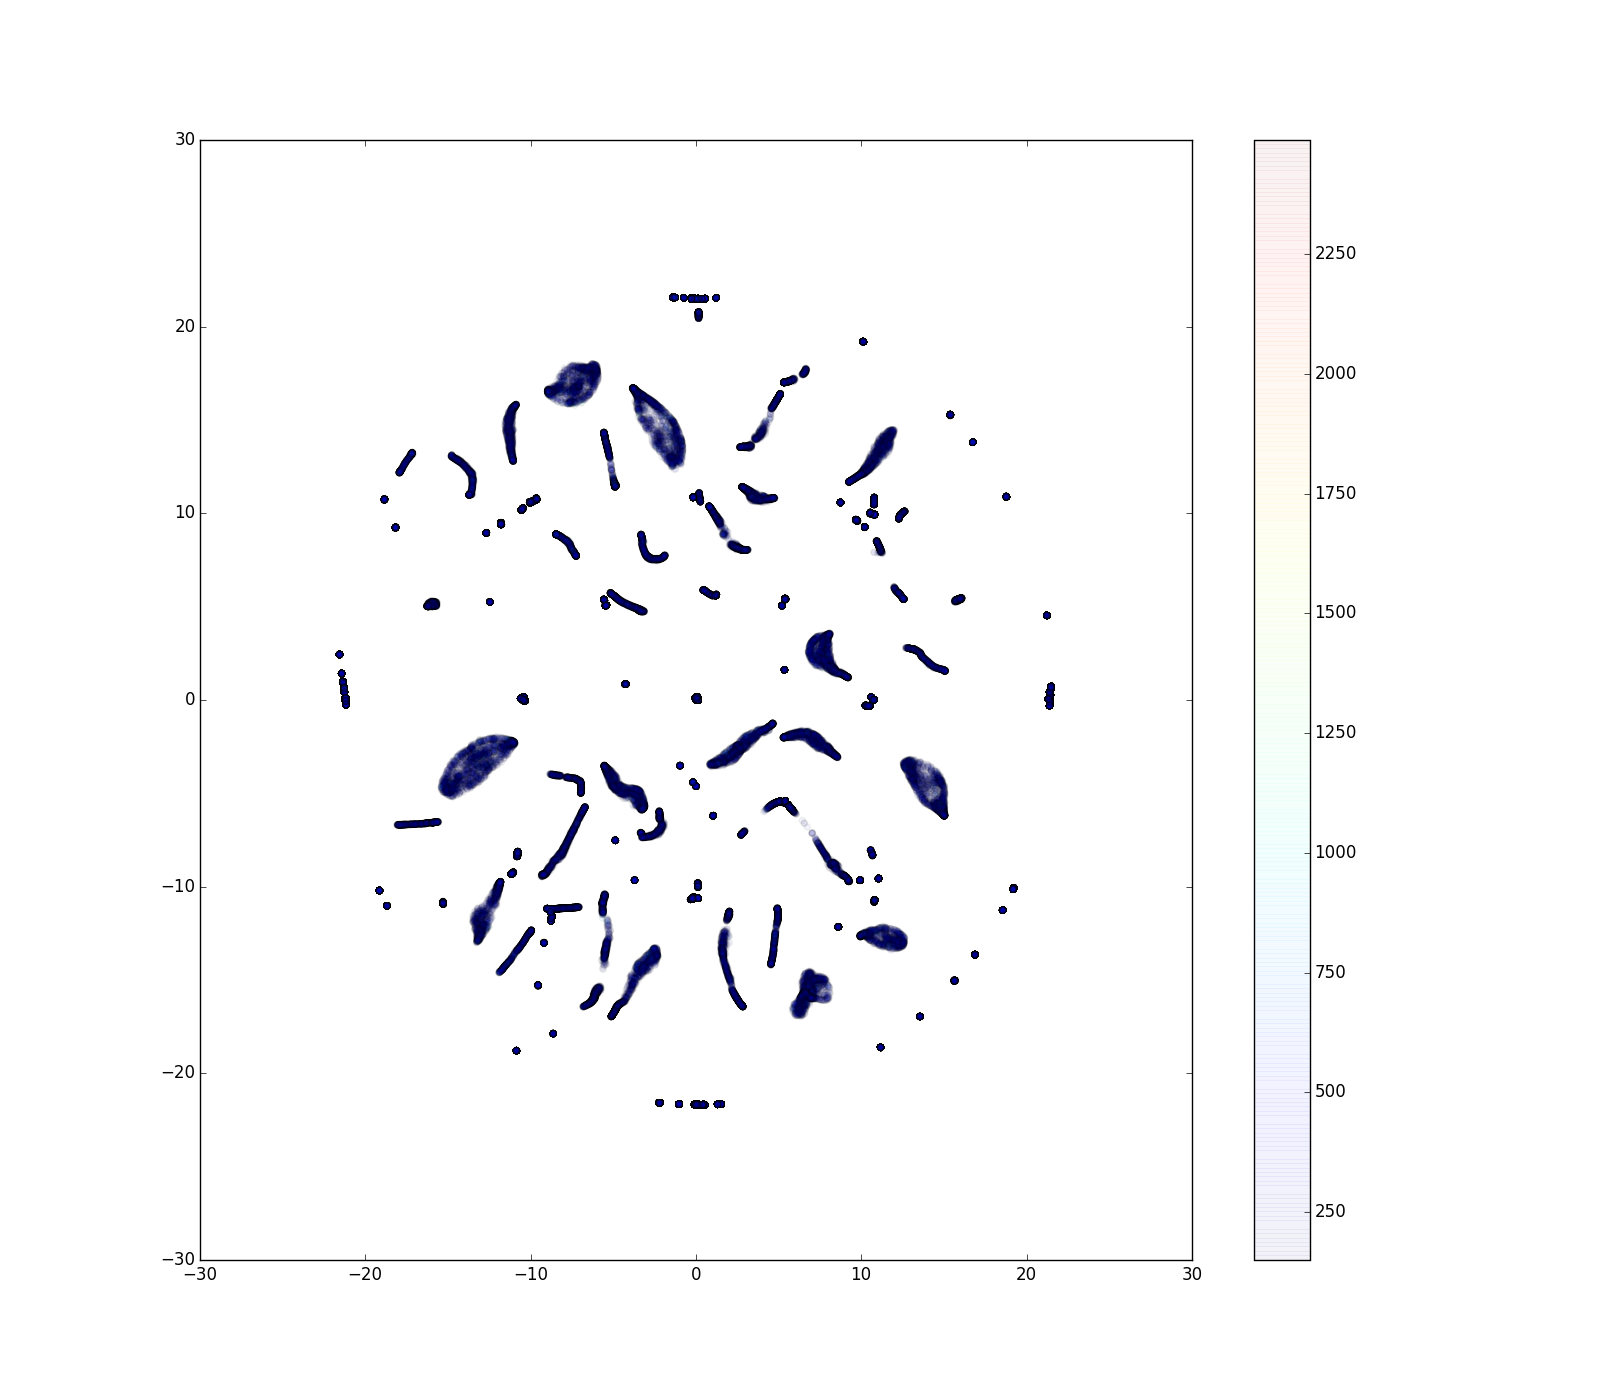

In [31]:
#ind_high = df.Customer_Value[df.Customer_Value>150].index
#W2d = bh_sne(X[ind_high], perplexity=250, theta=1)
Image("tsne_small_color3f.png")

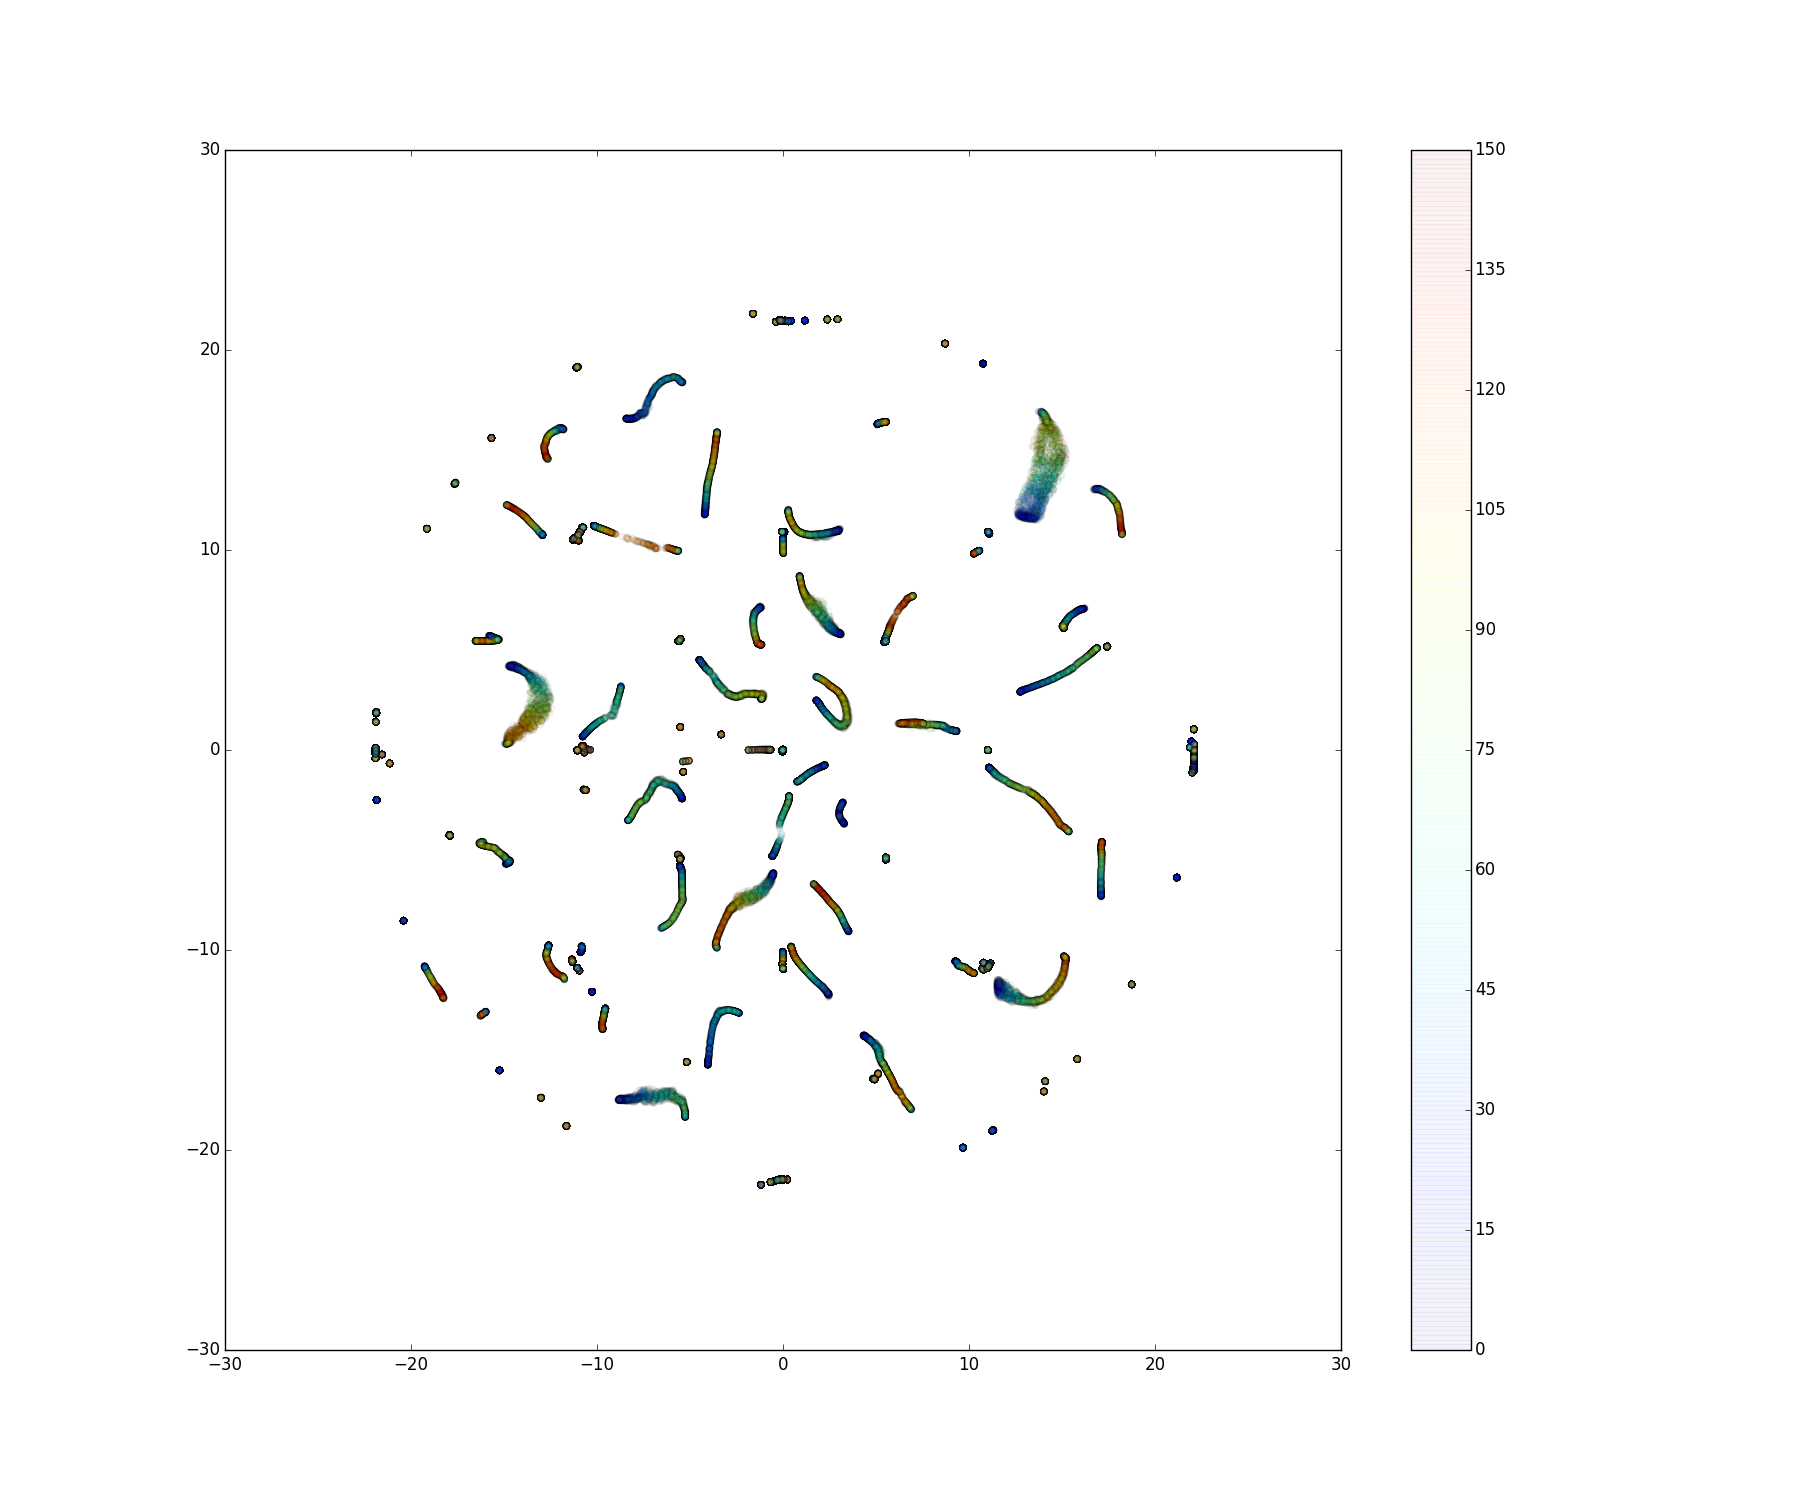

In [32]:
#ind_low = df.Customer_Value[df.Customer_Value<150].index
#ind = np.random.choice(ind_low,200000,replace=False)
#W2d_o = bh_sne(X[ind], perplexity=250, theta=1)
Image("tsne_small_color3f_o2.png")

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, cdist

scaler = StandardScaler()
Xscl = scaler.fit_transform(X)

#np.random.seed(333)
#ind = np.random.choice(Xscl.shape[0],100000,replace=False)
#total_sum = sum(pdist(Xscl[ind])**2)/100000

krange = range(1,50)
kmmodels = [KMeans(n_clusters=k, verbose=10, n_jobs=10).fit(Xscl) for k in krange]
centroids_l = [m.cluster_centers_ for m in kmmodels]

# dist from each point to its centroid
tmp_dist = [cdist(Xscl, cs, 'euclidean') for cs in centroids_l]
d2centr = [np.min(d, axis=1) for d in tmp_dist]

incluster_dist = [sum(d**2) for d in d2centr]

total_sum - incluster_dist


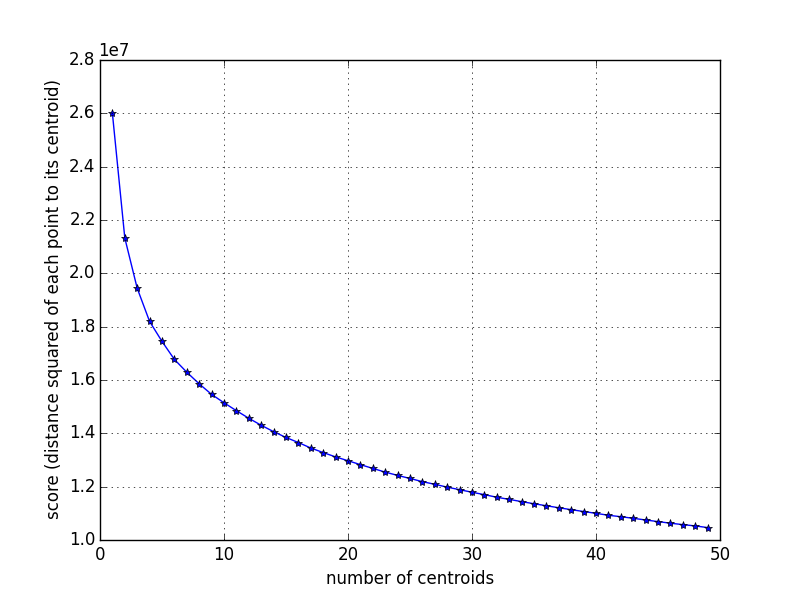

In [3]:
Image("kmeans.png")

# Regression

In [ ]:
X = feat.values
y = df.Customer_Value.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1)



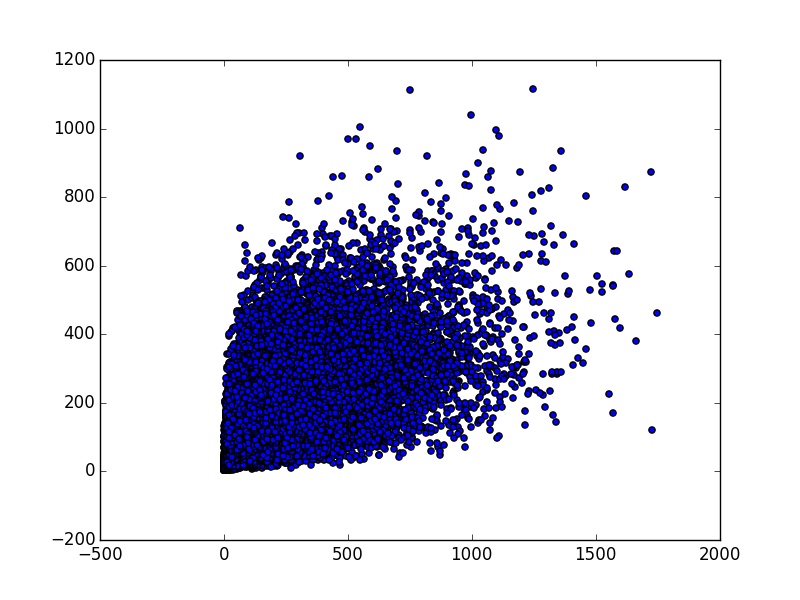

In [33]:
#kn = KNeighborsRegressor()
#knp = make_pipeline(StandardScaler(), kn)
#ypred = knp.fit(Xtrain, ytrain).predict(Xtest)
#r2_score(ytest, ypred)
Image("scat_pred.png", width=400)

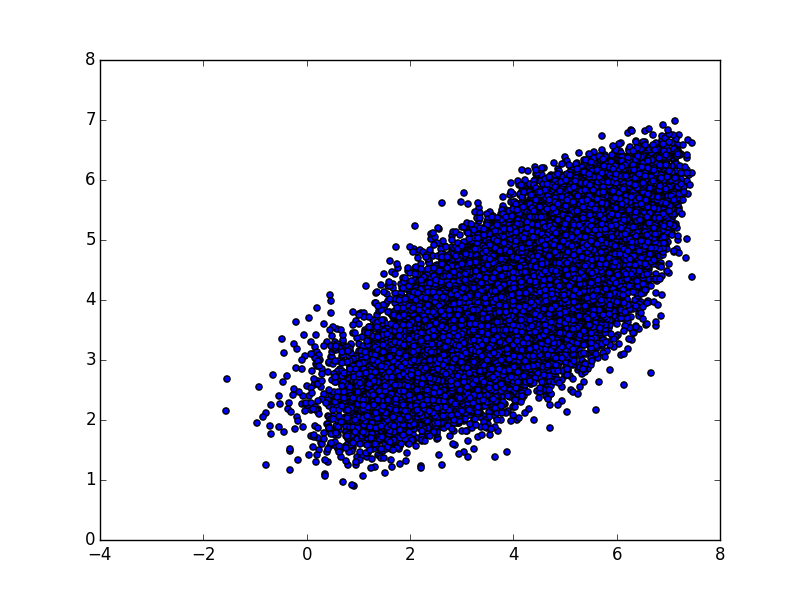

In [34]:
Image("scat_pred_log.png", width=400)

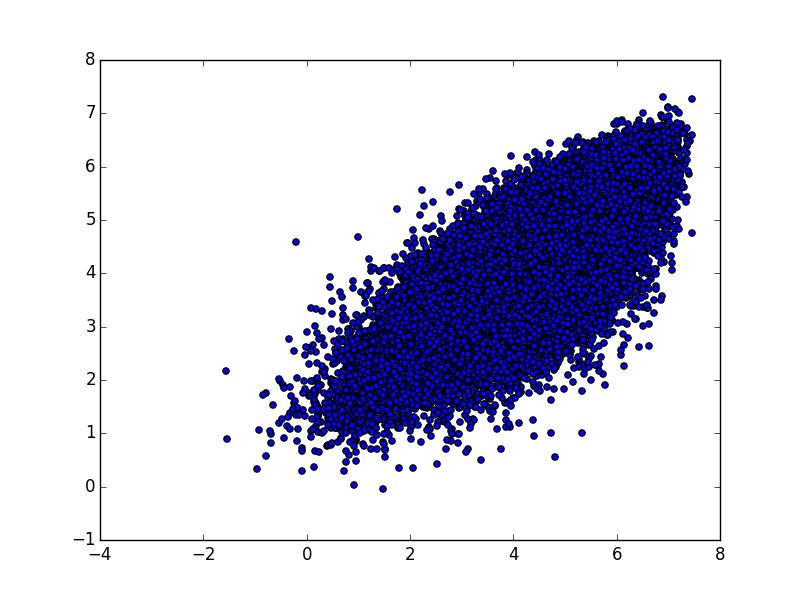

In [35]:
#rf = RandomForestRegressor(n_jobs=8, verbose=10)
#ypred = rf.fit(Xtrain, ytrain).predict(Xtest)
#r2_score(ytest, ypred)
Image("scat_pred_rflog.png", width=400)

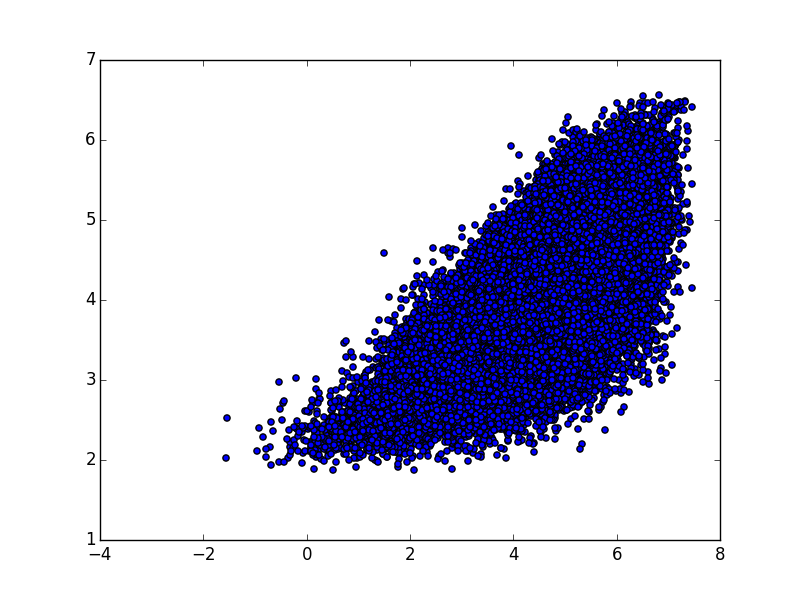

In [36]:
#gb = GradientBoostingRegressor(verbose=10)
#ypred = gb.fit(Xtrain, ytrain).predict(Xtest)
#r2_score(ytest, ypred)
Image("scat_pred_gblog.png", width=400)

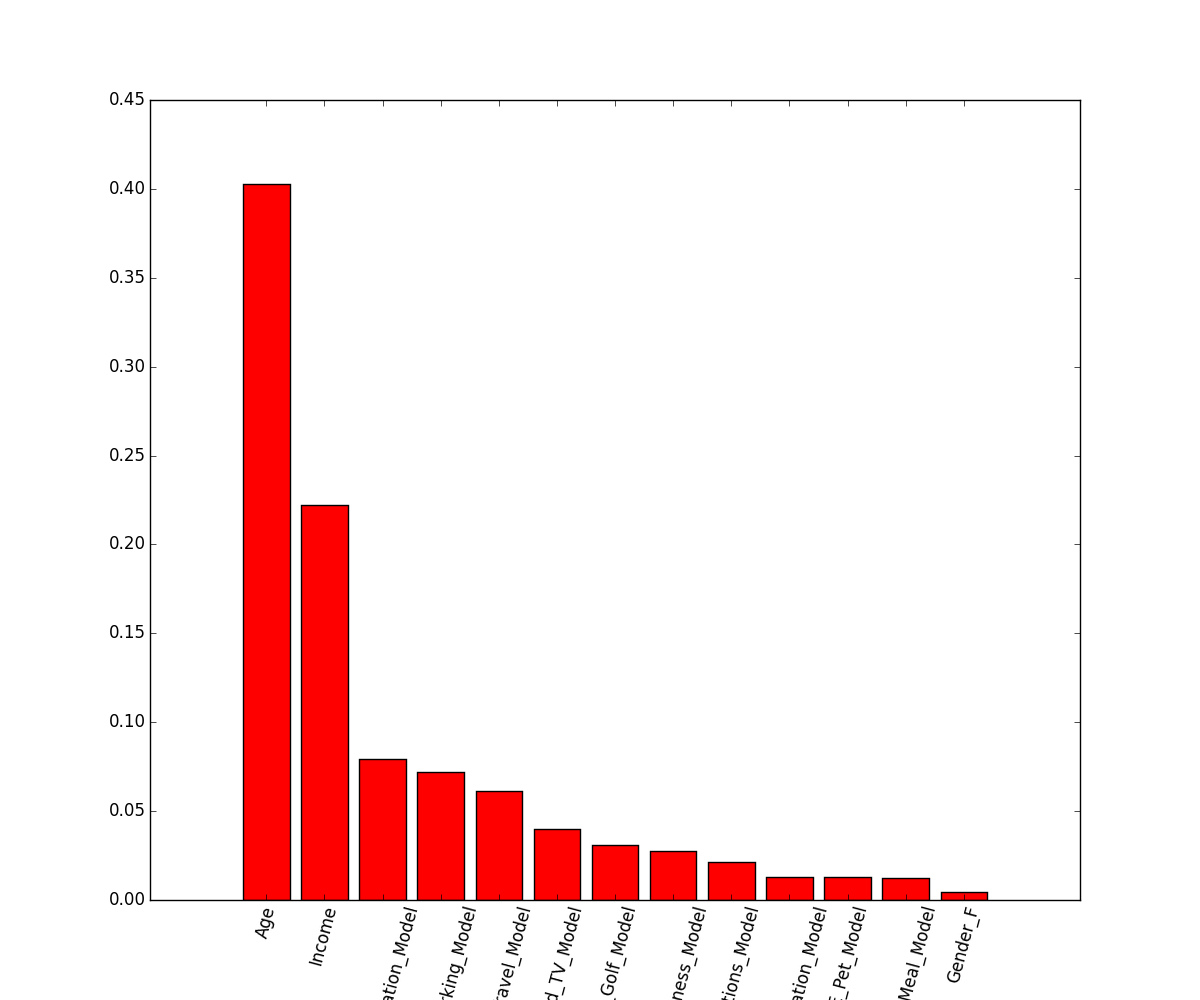

In [37]:
#importances = rf.feature_importances_
#std = np.std([x.feature_importances_ for x in rf.estimators_], axis=0)
#indices = np.argsort(importances)[::-1]
#rf_list = feat.columns[indices].tolist()[:20]
#rf_ind = indices[:20]

Image("./feat_rank.png", width=500)

In [ ]:
params = { "n_estimators": [50, 500, 1000],
           "max_features": ['auto','sqrt']
           "max_depth": [5, 10, 20, 30] }
rf = RandomForestRegressor(n_jobs=8)
grid = GridSearchCV(rf, params, verbose=10)
grid.fit(Xtrain,ytrain)
grid.best_score_
grid.best_params_

In [ ]:
kn = KNeighborsRegressor()
knp = make_pipeline(StandardScaler(), kn)
params = {'kneighborsregressor__n_neighbors': sp_randint(3,20)}

grid = RandomizedSearchCV(knp, params, n_jobs=9, n_iter=50, verbose=10)
grid.fit(Xtrain,ytrain)
grid.best_score_



In [ ]:
xgb = XGBRegressor()
params = {'n_estimators': sp_randint(50,1000),
          'max_depth':sp_randint(3,20),
          'learning_rate': sp_rand(0.001,1)
         }
grid = RandomizedSearchCV(xgb, params, n_jobs=9, n_iter=50, verbose=10)
grid.fit(Xtrain,ytrain)
grid.best_score_

In [38]:
!head ./scores_xgb.txt

[mean: 0.78418, std: 0.00119, params: {'n_estimators': 254, 'learning_rate': 0.7837701423747425, 'max_depth': 7},
 mean: 0.81726, std: 0.00055, params: {'n_estimators': 506, 'learning_rate': 0.27768710750620074, 'max_depth': 7},
 mean: 0.75577, std: 0.00045, params: {'n_estimators': 946, 'learning_rate': 0.6109286908166872, 'max_depth': 10},
 mean: 0.81652, std: 0.00040, params: {'n_estimators': 314, 'learning_rate': 0.17423156828246367, 'max_depth': 7},
 mean: 0.80048, std: 0.00055, params: {'n_estimators': 450, 'learning_rate': 0.48234084188499327, 'max_depth': 4},
 mean: 0.79307, std: 0.00084, params: {'n_estimators': 919, 'learning_rate': 0.8336558379772282, 'max_depth': 3},
 mean: 0.80985, std: 0.00033, params: {'n_estimators': 298, 'learning_rate': 0.3729868796060585, 'max_depth': 6},
 mean: 0.70226, std: 0.00150, params: {'n_estimators': 963, 'learning_rate': 0.9050560283186064, 'max_depth': 9},
 mean: 0.81016, std: 0.00021, params: {'n_estimators': 172, 'learning_rate': 0.19760

In [ ]:
params = {'n_estimators': 939, 'learning_rate': 0.05188516380819663, 'max_depth': 9}